## Introduction to Machine Learning with Random Forests

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/n2cholas/dsc-workshops/blob/master/Random_Forests_Workshop_V2.ipynb)


Through this workshop you will learn how to quickly model and understand datasets using scikit-learn. Topics will include a basic introduction to using decisions trees and random forests, understanding feature importance, identifying model weaknesses, explaining your model and more. This workshop will focus on evaluating your model with less emphasis on syntax and mechanics.

This notebook contains some high level explanations of the code not covered in the workshop, but does not contain all the details of the main workshop. [Here](https://docs.google.com/presentation/d/14e5iw-AswCbli4YUHZI1d9OYu4csM2nyxv84Ytu68QY) is a link to the slides for the workshop, which contain some examples not shown in this notebook.

Many of the interpretation techniques were taken from the [fast.ai ML course](http://course18.fast.ai/ml). Check it out!!

If the open in colab button doesn't work, use this link: https://colab.research.google.com/github/n2cholas/dsc-workshops/blob/master/Random_Forests_Workshop_V2.ipynb

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Wrangling

Data munging/wrangling is the process of transforming your raw data into a form suitable for analysis or modelling. Typically this involves dealing with null values, finding (and possibly correcting) data issues, transforming non-numerical data into numerical data, and more.

In the "real world", you will need to do much more than is shown below. There are numerous Kaggle Kernels demonstrating in depth data cleaning. For the purposes of this workshop, we will do (less than) the bare minimum for two reasons:

1. We are using a relatively clean dataset (very few data oddities).
2. Our model analysis will tell us where to focus our data cleaning and feature engineering efforts.
3. This workshop is only an hour long :P.

Here is an example of a great example of some data exploration and correction: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

In [0]:
def show_all(df):
    """Shows our dataframe without cutting off any rows or columns."""
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

First, we take a look at our data to get a sense of the types of values in the columns. We do this by looking at some of our data and using numerical summaries.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/n2cholas/dsc-workshops/master/Random%20Forest%20Workshop/data/train.csv')
show_all(df.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
len(df)

1460

In [5]:
show_all(df.describe())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We want to ensure all our columns (or features) have numerical or categorical values. Let's look at the data types of each column.

In [6]:
show_all(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


Most of the data is of type "object". Typically, this is a String but could also be other Python objects, such as lists or dicts. Just based on the names, it looks like these are all categorical features. Let's check this by looking at the unique values in each column.

In [7]:
for c in df.columns[df.dtypes=='object']:
    print(df[c].value_counts())
    print()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Pave    1454
Grvl       6
Name: Street, dtype: int64

Grvl    50
Pave    41
Name: Alley, dtype: int64

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood

Great, now we know all of our object columns contain categories. In reality, this is rarely the case and you would have to do additional cleaning steps.

We should also note that some of these categories are ordered, such as ExterQual and ExterCond.

Also, you may have a dataset with thousands of features, so it is infeasible to look through all the categories like we did. In this case you can look at the number of unique values for each feature. Features with many unique values might be numerical values that weren't properly encoded or free form text, which would have to be dealt with otherwise.

Next thing we want to do is deal with null values. Let's see which columns have null values by showing the proportion of values in each column that are null.

In [8]:
x = (df.isnull().sum()/len(df)).to_frame(name='perc_null')
x['types'] = df.dtypes
x[x.perc_null>0].sort_values('perc_null', ascending=False)

,perc_null,types
PoolQC,0.995205,object
MiscFeature,0.963014,object
Alley,0.937671,object
Fence,0.807534,object
FireplaceQu,0.472603,object
LotFrontage,0.177397,float64
GarageType,0.055479,object
GarageYrBlt,0.055479,float64
GarageFinish,0.055479,object
GarageQual,0.055479,object


For the categorical variables, we will simply add a null category, when we turn them into categorical variables, pandas will automatically create a nan category if needed.

Dealing with nans (not a numbers) in numerical columns is more challenging. You typically want to replace the nans with a default value. Is there a reasonable default for this column? Does 0 make sense? What about the min/max/median? There is much discussion about this on the web.

Here, PoolQC and MasVnrArea are null when the house does not have a pool, so it makes sense to fill in 0 for these columns. For LotFrontage and GarageYrBuilt, we use the median. For the latter two, the missing information may have some pattern that helps us predict the price, so we will create an indicator column that tells us whether the column was null or not. This could be useful if, for example, all houses without a LotFrontage had a very small Lot, so they have a lower cost, so the indicator would help our model learn that this is the case.

In [0]:
df.PoolQC.fillna(0, inplace=True)
df.MasVnrArea.fillna(0, inplace=True)

def fill_nulls(col, filler=np.nanmedian):
    df[f'{col}_null'] = 0
    df.loc[df[col].isnull(), f'{col}_null'] = 1
    df[col].fillna(filler(df[col]), inplace=True)

fill_nulls('LotFrontage')
fill_nulls('GarageYrBlt')

Now, the "object" dtype columns are ready to be turned into actual categories. You can read more about the "category" dtype on the [pandas documentation page](https://pandas.pydata.org/pandas-docs/version/0.24.2/reference/api/pandas.Categorical.html). Essentially, it changes all the values from strings to numbers, so our model can use them.

For a vast majority of machine learning model types, we would need to do one additional step and "one-hot encode" these categorical variables. Since we are using a tree-based model, we will not need to do this, so we will not cover it.

In [0]:
for col in df.columns[df.dtypes=='object']:
    df[col] = df[col].astype('category')

We noted above that some of the categorical features were ordered. We will encode two of them as ordered categorical columns, but leave the rest as an exercise.

In [0]:
from pandas.api.types import CategoricalDtype

order = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
cat_type = CategoricalDtype(categories=order, ordered=True)
df['ExterQual'] = df['ExterQual'].astype(cat_type)
df['ExterCond'] = df['ExterCond'].astype(cat_type)

We can take a look at some of the category codes along with the original strings:

In [12]:
print(df['ExterQual'][:10].cat.codes)
print(df['ExterQual'][:10])

0    3
1    2
2    3
3    2
4    3
5    2
6    3
7    2
8    2
9    2
dtype: int8
0    Gd
1    TA
2    Gd
3    TA
4    Gd
5    TA
6    Gd
7    TA
8    TA
9    TA
Name: ExterQual, dtype: category
Categories (5, object): [Po < Fa < TA < Gd < Ex]


So far, we've done some basic data transformations so the data can be fed into our model. We did no feature engineering or data exploration. Your dataset could have thousands of dimensions, so it is infeasible to extensively explore the data before modelling. Our approach will be to let the model tell us what's important and what's not so we can focus our effots appropriately.

## Modeling

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Our goal is to predict the price of the houses given the rest of the information. We start by splitting our dataframe into our features (our model inputs) and our target (the price we are trying to predict).



In [0]:
df_y, df_x = df['SalePrice'], df.drop('SalePrice', axis=1) # same as axis='columns'

Scikit-learn expects numerical values for all the columns, but our categorical variables contain text. We will replace the text with their numeric category number:

In [0]:
for col in df_x.columns[df_x.dtypes=='category']:
    df_x[col] = df_x[col].cat.codes

In machine learning, you typically split your data into a training, validation, and test set. You train your model on the training set, then evaluate the performance on the validation set. You use this validation set to tune hyperparameters (explained later). After selecting your model, you use the test set as one final check to make sure your model generalizes well (and you didn't just "overfit" to your validation set).

These concepts will be explained in more detail below. We split our data into just training and validation for simplicity, as we won't be doing any rigorous model selection.

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

Let's create some convenience functions to evaluate our model. Metric selection will not be discussed during this workshop. Here, we use the root mean squared error as our metric. Mean squared error is a common metric used for regression problems, and root mean squared error is nice in that it is in the same units as your original output.

In [0]:
def rmse(x,y): 
    return np.sqrt(np.mean(((x-y)**2)))

def print_score(model, X_t=X_train, y_t=y_train, X_v=X_valid, y_v=y_valid):
    scores = [rmse(model.predict(X_t), y_t), rmse(model.predict(X_v), y_v),
              model.score(X_t, y_t), model.score(X_v, y_v)]
    
    for t, s in zip(['Train RMSE', 'Valid RMSE', 'Train R^2', 'Valid R^2'], scores):
        print(f'{t}: {s}')

Time to fit our first model: a DecisionTree! It's as easy as:

In [18]:
tree = DecisionTreeRegressor(min_samples_leaf=50)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=50,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

We used the `min_samples_leaf` argument to limit the size of the tree so we can visualize it below:

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


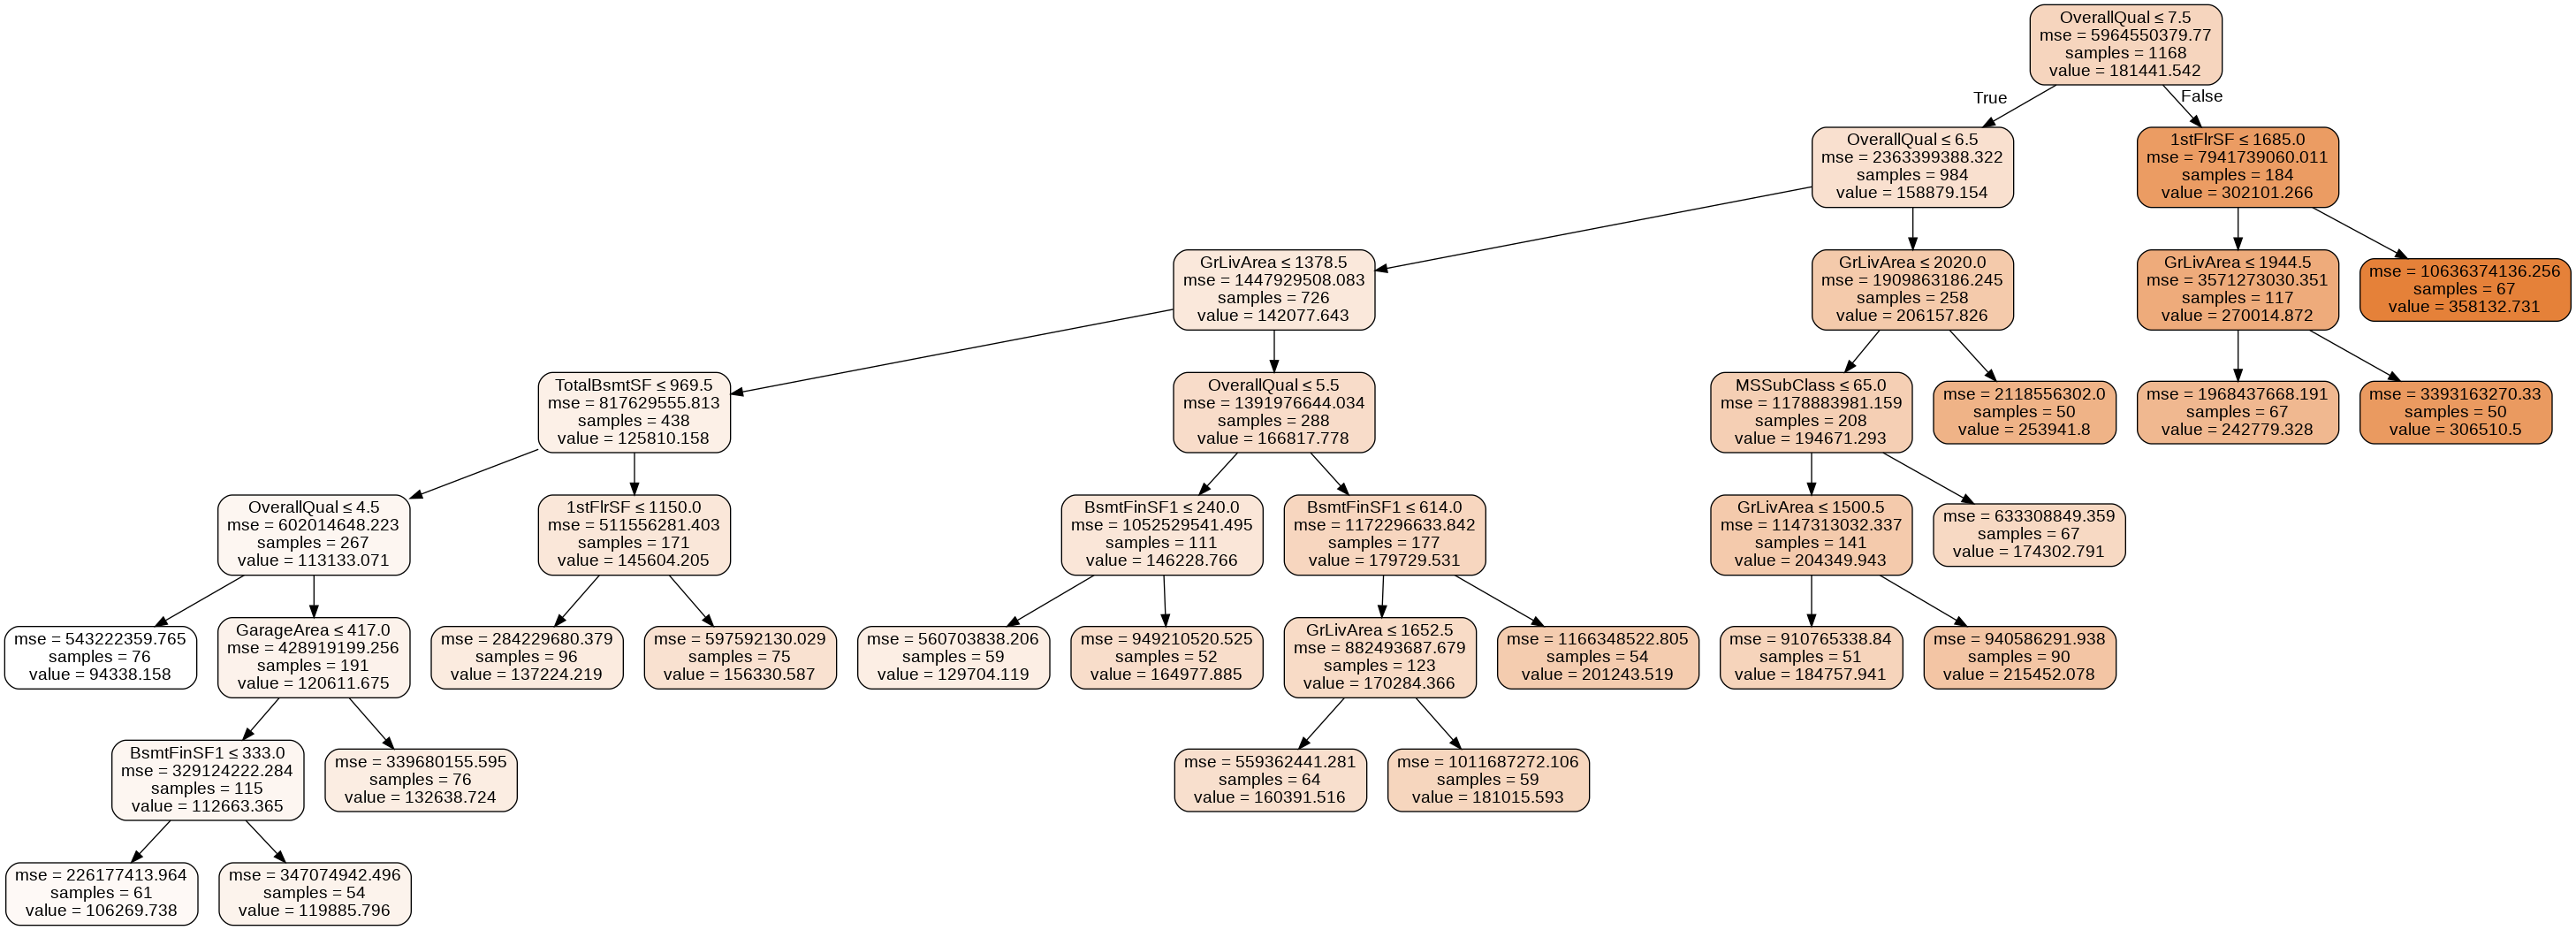

In [19]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
g = export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Given the features, the decision tree works as follows: we start at the root and look at the feature in question. If the condition at the top is True, we follow the True branch, otherwise we follow the False branch. This process continues until we reach a leaf. The value at the leaf is our prediction. 

The tree is trained as follows. We take the data, and we look at all the features and values of these features to find the best split. The best split is the one such that our evaluation metric (mean squared error) is minimized by the split. In other words, if this split is used, the mean squared error of the model that comes from this split is minimized. The samples represents the number of samples of data that are in the subtree (due to the splits). The value is the mean target value of all the samples in that subtree. Then we repeat until each leaf only contains one sample (usually).


Let's build a full decision tree and evaluate its performance:

In [20]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print_score(model)

Train RMSE: 0.0
Valid RMSE: 43111.0938316298
Train R^2: 1.0
Valid R^2: 0.7576939544477124


We see the Decision Tree has overfit. So, we introduce Random Forests:

In [21]:
model = RandomForestRegressor(n_estimators=30, 
                              n_jobs=-1)
model.fit(X_train, y_train)
print_score(model)

Train RMSE: 11972.136923038881
Valid RMSE: 29315.10749027229
Train R^2: 0.9759693433070632
Valid R^2: 0.8879610196550729


There are a few key hyperparameters to tune (shown below): 

In [22]:
model = RandomForestRegressor(n_estimators=50, 
                              n_jobs=-1,
                              min_samples_leaf=1,
                              max_features=0.8) #'sqrt', 'log2'
model.fit(X_train, y_train)
print_score(model)

Train RMSE: 11464.59450285856
Valid RMSE: 29159.246751559134
Train R^2: 0.9779636487670959
Valid R^2: 0.889149216323862


## Feature Importances

Now that we have a model with reasonable performance, we can use it to understand our dataset (and use that to improve the model). The first is looking at feature importance. 

To calculate feature x's importance, we first shuffle x column. Now, the feature is uncorrelated with the target. Next, we evaluate the model's performance on the training set and see how much it has decreased compared to when the feature was unshuffled. The higher this value, the more important the feature is.

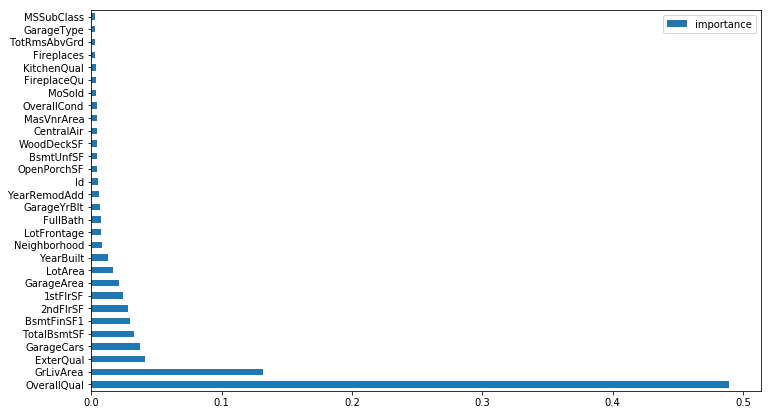

In [23]:
fi = pd.DataFrame(model.feature_importances_,  # properties with an underscore are available after you fit the model
                  index = X_train.columns,
                  columns=['importance'])
fi = fi.sort_values('importance', ascending=False)
fi[:30].plot.barh(figsize=(12, 7))

In [24]:
fi.loc['YearRemodAdd']

importance    0.00591
Name: YearRemodAdd, dtype: float64

These importances tell you where to focus your attention on your dataset. Your data may have thousands of features, so having a way to narrow your investigation scope is very helpful. 

Here are a few things to think about:


*   Which features are the most important? This is a good opportunity to do some feature engineering. For example, if a date turned out to be an important feature, you may want to split this up into more granular features, such as splitting up the day/month/year, day of week, adding season, etc.
*   Which features are less important? Can we make them more useful through feature engineering?
*   Do the important features make sense? For example, suppose the data had an ID number that was assigned randomly, but turned out to be important. This is suspicious and you should look into the data and see why this is the case.
*   Are there are any features you expected to be important but aren't? This could indicate some data cleaning work you missed. If not, this is useful to build intuition about your dat.
*   If there are highly correlated features, which of the correlated features are important? How does removing the less important feature affect the model performance? 
*    And many more...

Let's try keeping only the important features and seeing how the model performs:



In [0]:
X_train_new, X_valid_new = X_train[fi[fi['importance'] > 0.005].index], X_valid[fi[fi['importance'] > 0.005].index]

In [26]:
X_train.shape  # see how many features are left

(1168, 82)

In [27]:
model_new = RandomForestRegressor(n_estimators=30, 
                                  n_jobs=-1,
                                  oob_score=True,
                                  min_samples_leaf=3,
                                  max_features=0.5)
model_new.fit(X_train_new, y_train)
print_score(model_new, X_t=X_train_new, X_v=X_valid_new)

Train RMSE: 17820.096007344346
Valid RMSE: 29815.94532060853
Train R^2: 0.9467594702883222
Valid R^2: 0.8841000276456914


We can compare the feature importances from the model trained with all the features vs the model with just some of the features.

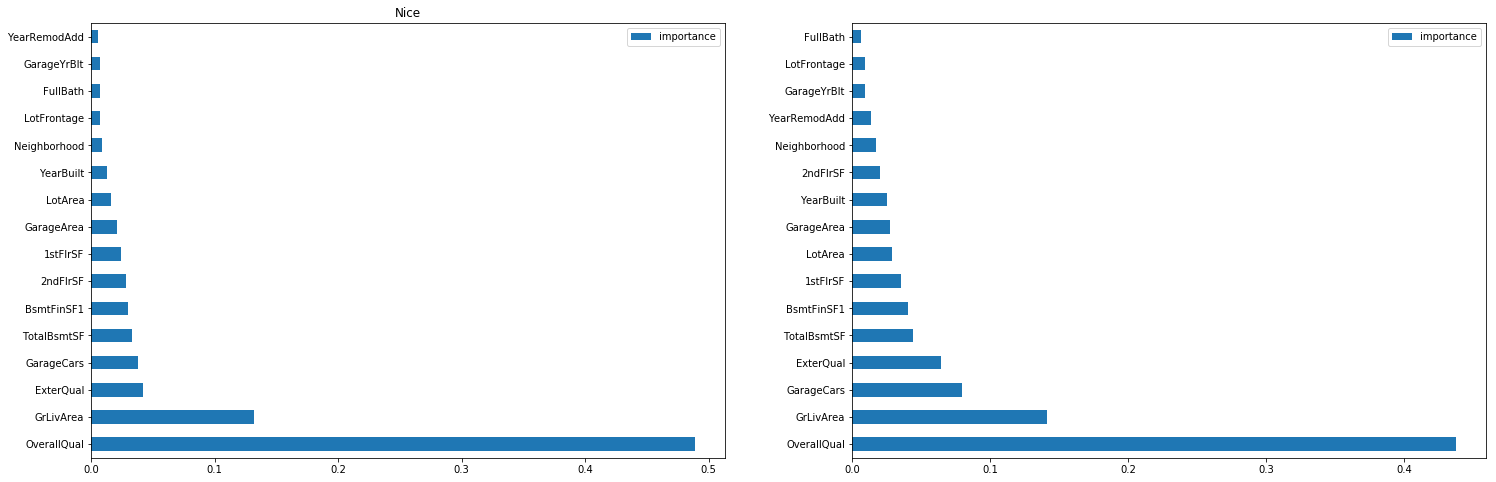

In [28]:
fi2 = pd.DataFrame(model_new.feature_importances_,
                   index = X_train_new.columns,
                   columns=['importance']).sort_values('importance', ascending=False)

fig, ax = plt.subplots(1,2, figsize=(25,8))
fi[:16].plot.barh(ax=ax[0], title='Nice')
fi2.plot.barh(ax=ax[1])

## Identifying Correlated Features

Identifying and resolving correlated features can sometimes improve your model in a few ways:

*   Decreases the dimensionality of your data
*   Can reduce overfitting
*   Prevents the model from learning unintended biases
*   Makes the model more interpretable (treeinterpeter/partial depencence plots will be more accurate)
*   And more.

For many model types, you would look at normal (linear) correlation, but a random forest is not affected by just linear correlation. Since the trees simply split the data at some point, just the **rank** of the feature matters. 

Consider you sort the data by a feature. The rank is the position of the example in the sorted dataset. Below, we identify rank correlations. 


In [0]:
from scipy.cluster import hierarchy as hc
from scipy import stats

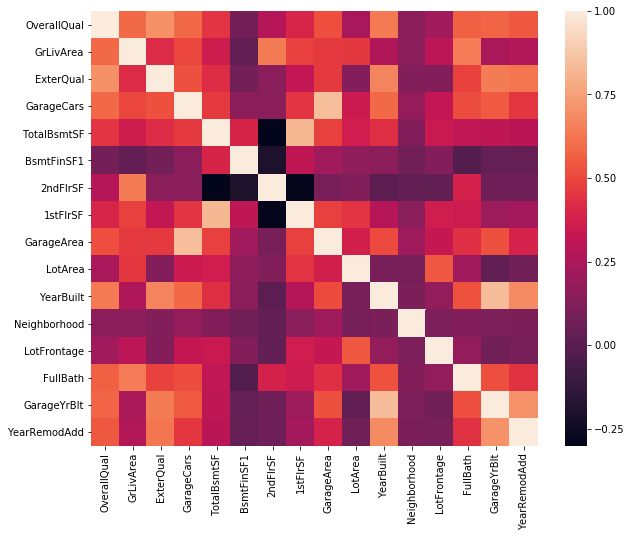

In [30]:
df2 = X_train_new[X_train_new.columns[X_train_new.dtypes != 'category']]
corr = np.round(stats.spearmanr(df2).correlation, 4)
fig, ax = plt.subplots(figsize=(10,8))
g = sns.heatmap(corr, ax=ax)
g.set_yticklabels(df2.columns, rotation=0)
g.set_xticklabels(df2.columns, rotation=90)
None

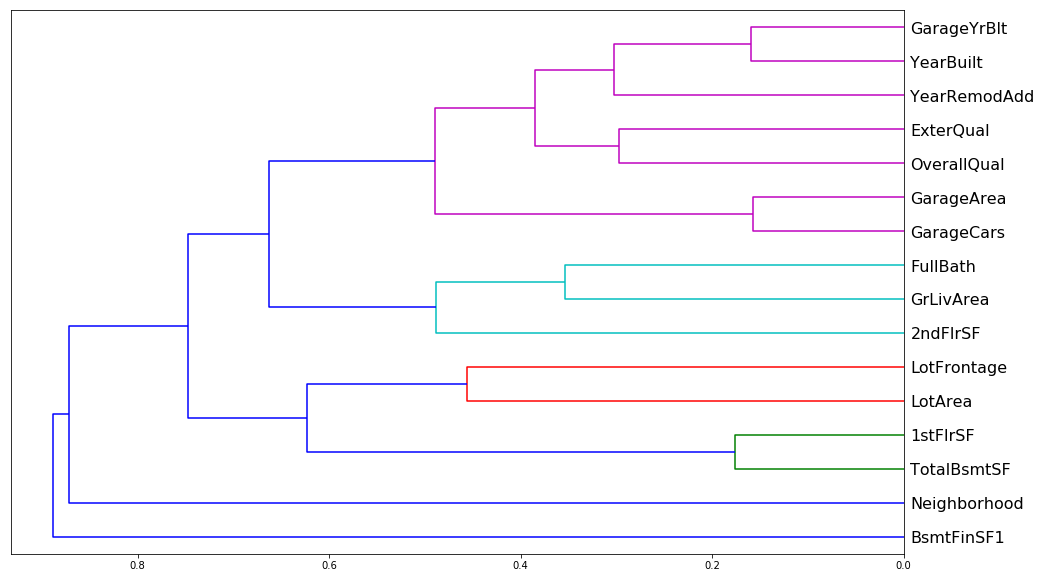

In [31]:
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df2.columns, orientation='left', leaf_font_size=16)
plt.show()

## Tree Interpreter

Tree interpreter is a great way to understand the individual predictions. Recall for a Decision Tree, at each node, the model makes a "decision" based on a condition on a feature to follow the left child or the right child. Each node contains the average target value for the subset of data that satisfies the condition. The tree interpreter measures how much the average changes for each of these decisions for each feature (averaged across all trees). We call this average change the contribution of the feature.

In [32]:
!pip install treeinterpreter

In [0]:
from treeinterpreter import treeinterpreter as ti

r = X_valid.values[None,0]

In [0]:
_, _, contributions = ti.predict(model, r)

In [35]:
ti_df = pd.DataFrame({
    'feature': X_valid.columns,
    'value': X_valid.iloc[0],
    'contributions': contributions[0],
})
show_all(ti_df.sort_values('contributions'))

,feature,value,contributions
OverallQual,OverallQual,6.0,-23204.618284
GrLivArea,GrLivArea,1068.0,-18869.146520
GarageArea,GarageArea,264.0,-6130.961614
GarageCars,GarageCars,1.0,-4230.235767
ExterQual,ExterQual,2.0,-3690.661634
YearBuilt,YearBuilt,1963.0,-1606.690435
FullBath,FullBath,1.0,-1549.810925
MoSold,MoSold,2.0,-1044.108978
GarageYrBlt,GarageYrBlt,1963.0,-839.353054
1stFlrSF,1stFlrSF,1068.0,-761.773371


## Partial Dependence Plots

We will not cover Partial Dependence Plots in this workshop, but here is some code demonstrating how you can use them. 

Partial dependence use the model and dataset as follows. It varies the value of the feature of interest while keeping the rest of the features the same. Then, it uses the model to make a prediction on this augmented data. This way, we can see the effect of that feature alone. This library finds clusters in the dataset predictions for you.

In [36]:
!pip install pdpbox

     |████████████████████████████████| 57.7MB 52.3MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=3a045d2a9989e4de9ac737174305e40d2b57e66fbf8aa1210e7092b5b415fef0
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [0]:
from pdpbox import pdp

def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(model, X_train, X_train.columns, feat)
    return pdp.pdp_plot(p, feat_name, 
                        plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f9573bb5a58>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f9572ceb898>})

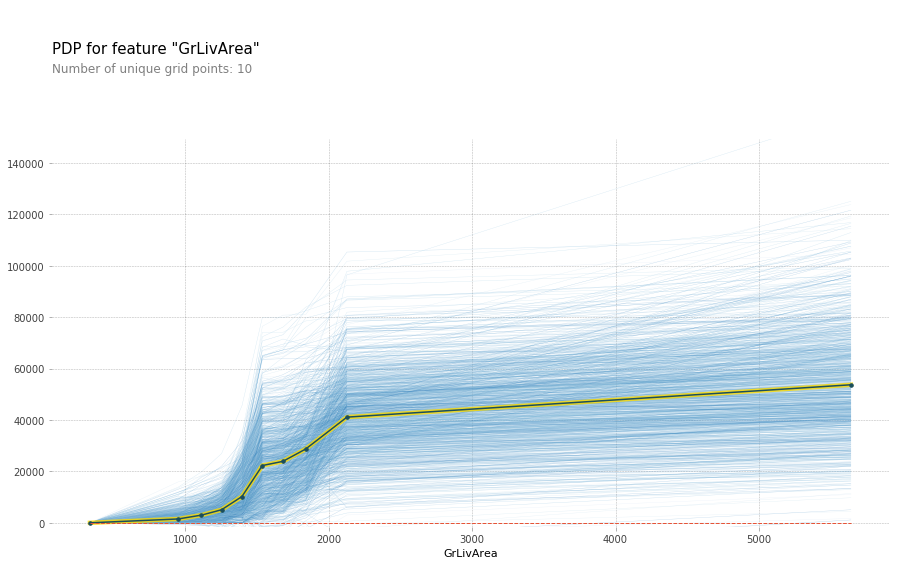

In [38]:
plot_pdp('GrLivArea')

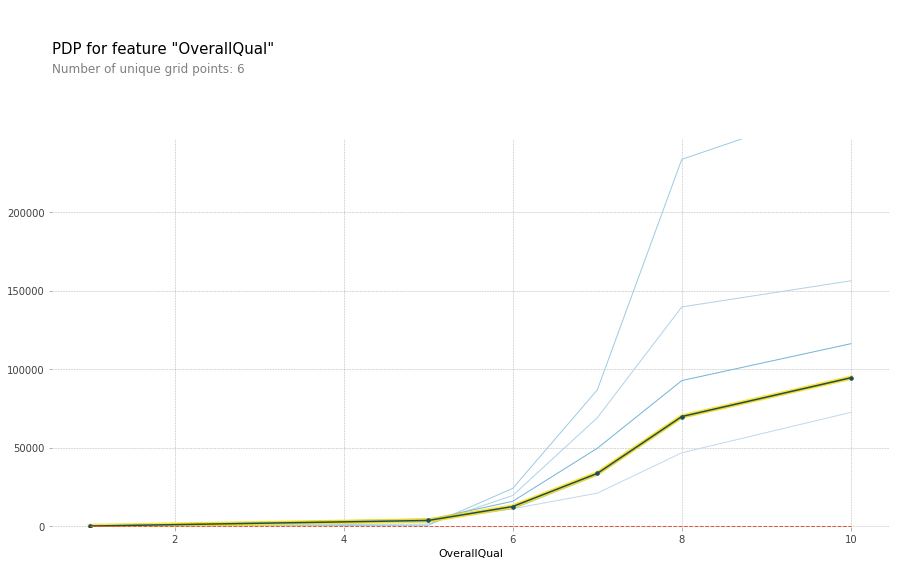

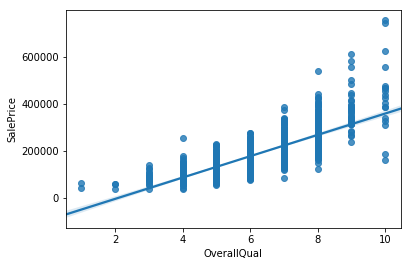

In [39]:
plot_pdp('OverallQual', clusters=5)
plt.figure()
sns.regplot(data=df, x='OverallQual', y='SalePrice')

There seems to be an issue in the library related to plotting (or perhaps my code is wrong somehow), which is why I use a try-except block. Due to this issue, the axis are not shown.

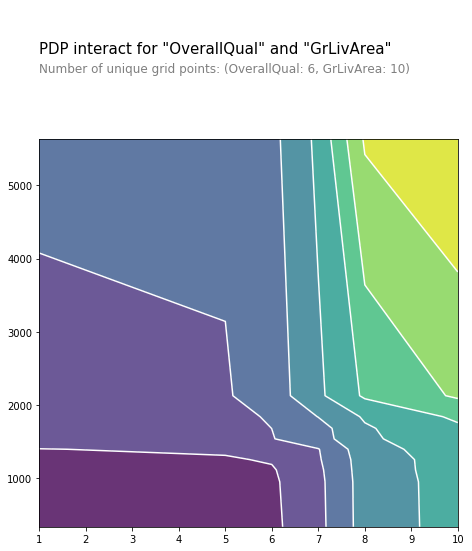

In [40]:
feats = ['OverallQual', 'GrLivArea']
p = pdp.pdp_interact(model, X_train, X_train.columns, feats)

try:
  pdp.pdp_interact_plot(p, feats)
except TypeError:
  pass

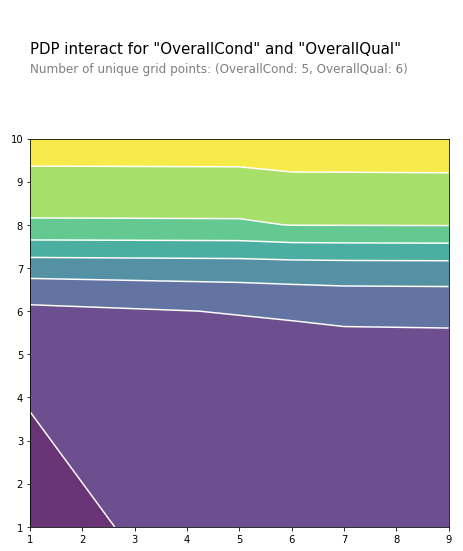

In [41]:
feats = ['OverallCond', 'OverallQual']
p = pdp.pdp_interact(model, X_train, X_train.columns, feats)

try:
  pdp.pdp_interact_plot(p, feats)
except TypeError:
  pass

## Standard Process for Quick RF Development:

1.	Using scoring metric (provided or decided), create a scoring function (training + validation).
2.	Create validation set with same properties as test set.
3.	Run a quick random forest on the data with minimal alterations.
4.	Plot feature importance, plot the features, and learn about those features (domain knowledge).
5.	Use natural breakpoint to remove unimportant features then plot again.
6.	Now, look at data carefully and encode important things better.
7.	Using heirachical clustering to remove redundant features (scipy)
8.	For interpretation, use partial dependence plots from PDP.
9.	Use Tree Interpreter to explain individual predictions.